In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

<Axes: xlabel='datetime'>

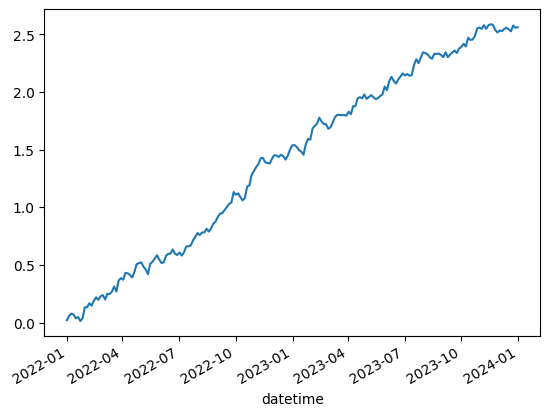

In [2]:
# Preparing returns without transaction cost

num_periods  = 200

start_date   = pd.to_datetime('2022-01-01')
end_date     = pd.to_datetime('2023-12-31')
trade_dates  = pd.to_datetime(np.sort(np.random.choice(pd.date_range(start=start_date, end=end_date, periods=num_periods + 1), num_periods, replace=False)))

df = pd.DataFrame({'datetime'  : trade_dates})
df['datetime' ] = pd.to_datetime(df['datetime'])
df['datetime_'] = df['datetime']
df = df.set_index('datetime')

outliers_percentage = 30
outliers_percentage = outliers_percentage/100.0
outliers_count      = int(num_periods*outliers_percentage)

percentage_changes = np.random.uniform(-0.045, 0.05, num_periods).astype(float)
extreme_returns    = np.random.uniform(-0.03,  0.1, outliers_count).astype(float)
outliers_date      = df['datetime_'].sample(n=outliers_count).to_list()
df[f"return"]      = percentage_changes

for outlier in list(zip(outliers_date, extreme_returns)):
    outlier_dt  = outlier[0]
    outlier_ret = outlier[1]
    df.loc[outlier_dt, f"return"] = outlier_ret

df.drop('datetime_', axis=1, inplace=True)

df['cum_return_test'] = df['return'].cumsum()

df['cum_return_test'].plot()

In [3]:
df

,return,cum_return_test
datetime,,
2022-01-01 00:00:00,0.020433,0.020433
2022-01-04 15:28:48,0.036617,0.057050
2022-01-08 06:57:36,0.021037,0.078087
2022-01-11 22:26:24,-0.008970,0.069116
2022-01-15 13:55:12,-0.032393,0.036723
...,...,...
2023-12-16 10:04:48,-0.013523,2.545331
2023-12-20 01:33:36,-0.017230,2.528102
2023-12-23 17:02:24,0.049666,2.577767


In [4]:
# Applying different transaction costs

# 0.15% for the commission
# 0.2%  for the spread and slippage
commission_percentage      = 0.15/100.0 # 0.15%
spread_slippage_percentage = 0.2 /100.0 # 0.2%
transaction_cost_log_0     = np.log(1-commission_percentage) + np.log(1-spread_slippage_percentage)

# Applying transaction cost as 0.5%
transaction_cost_percentage = 0.5/100.0 # 0.5%
transaction_cost_log_1      = np.log(1-transaction_cost_percentage)

# Adjusting with the different transaction costs
df['log_return'           ] = (1 + df['return']).apply(np.log)
df['adjusted_log_return_0'] = df['log_return'] + transaction_cost_log_0 # commission 0.15%, slippage 0.2%
df['adjusted_log_return_1'] = df['log_return'] + transaction_cost_log_1 # single cost 0.5%


# cumulating returns 
df['cum_return'           ] = df['log_return'           ].cumsum().apply(np.exp)
df['adjusted_cum_return_0'] = df['adjusted_log_return_0'].cumsum().apply(np.exp)
df['adjusted_cum_return_1'] = df['adjusted_log_return_1'].cumsum().apply(np.exp)

df

,return,cum_return_test,log_return,adjusted_log_return_0,adjusted_log_return_1,cum_return,adjusted_cum_return_0,adjusted_cum_return_1
datetime,,,,,,,,
2022-01-01 00:00:00,0.020433,0.020433,0.020227,0.016724,0.015214,1.020433,1.016864,1.015331
2022-01-04 15:28:48,0.036617,0.057050,0.035963,0.032460,0.030950,1.057798,1.050413,1.047247
2022-01-08 06:57:36,0.021037,0.078087,0.020818,0.017315,0.015806,1.080051,1.068759,1.063931
2022-01-11 22:26:24,-0.008970,0.069116,-0.009011,-0.012514,-0.014023,1.070362,1.055469,1.049115
2022-01-15 13:55:12,-0.032393,0.036723,-0.032929,-0.036432,-0.037942,1.035690,1.017707,1.010055
...,...,...,...,...,...,...,...,...
2023-12-16 10:04:48,-0.013523,2.545331,-0.013615,-0.017118,-0.018628,11.298448,5.686256,4.230022
2023-12-20 01:33:36,-0.017230,2.528102,-0.017380,-0.020883,-0.022392,11.103780,5.568742,4.136354
2023-12-23 17:02:24,0.049666,2.577767,0.048472,0.044969,0.043459,11.655256,5.824876,4.320080


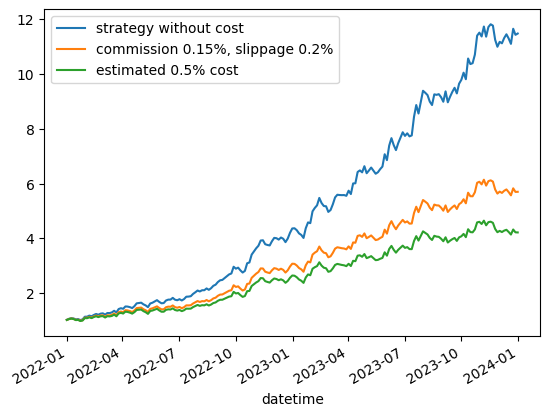

In [5]:
df[['cum_return', 'adjusted_cum_return_0', 'adjusted_cum_return_1']].plot()
plt.legend(['strategy without cost', 'commission 0.15%, slippage 0.2%', 'estimated 0.5% cost'])